In [17]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
%cd /content/drive/MyDrive/AI_1333/AI_Tuan6

/content/drive/MyDrive/AI_1333/AI_Tuan6


In [19]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode (connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [20]:
data = pd.read_csv('/content/drive/MyDrive/AI_1333/AI_Tuan6/dataID3test.csv')
data

,Clothes,Temperature,Humidity,Wind,Class
0,more,high,prodigious,no,N
1,more,high,prodigious,great,N
2,more,high,prodigious,middling,N
3,normal,high,prodigious,no,P
4,normal,high,prodigious,middling,P
5,enough,moderate,prodigious,no,N
6,enough,moderate,prodigious,middling,N
7,enough,high,very good,no,P
8,enough,high,very good,great,N
9,more,moderate,prodigious,no,N


In [21]:
X = data.iloc[:,:-1] # Thi 50%: Sửa -1
X

,Clothes,Temperature,Humidity,Wind
0,more,high,prodigious,no
1,more,high,prodigious,great
2,more,high,prodigious,middling
3,normal,high,prodigious,no
4,normal,high,prodigious,middling
5,enough,moderate,prodigious,no
6,enough,moderate,prodigious,middling
7,enough,high,very good,no
8,enough,high,very good,great
9,more,moderate,prodigious,no


In [22]:
y = data.iloc[:,4] # Thi 50%: Lấy cột thứ 5 trong bản, cột thứ 5 là cột quyết định
y

0     N
1     N
2     N
3     P
4     P
5     N
6     N
7     P
8     N
9     N
10    N
11    N
12    N
13    P
14    P
15    P
16    P
17    P
18    N
19    P
Name: Class, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,Clothes,Temperature,Humidity,Wind
0,1,0,0,2
1,1,0,0,0
2,1,0,0,1
3,2,0,0,2
4,2,0,0,1
5,0,1,0,2
6,0,1,0,1
7,0,0,1,2
8,0,0,1,0
9,1,1,0,2


In [26]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y) # hàm .fit là Huấn luyện mô hình (train module)
X_in = np.array([2, 0,0])
#X_in = np.array([0,0,0])
y_pred = regressor.predict([X_in]) # .predict : Hàm dự đoán . Đưa ra kết quả kiểu thử
y_pred # Trả về nhánh bất kỳ

# Đánh giá độ chính xác 

# Nhận diện chử số viết tay: BƯớc kiểm thử - 

# BTVN: Sử dụng dữ liệu dòng 5 (bất kỳ), trong bảng để trả về không mua máy tính

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['N'], dtype=object)

In [27]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('Tree_Buy_Computer.png')

# Conda: conda install graphviz
# HomeWork : Lưu tấm hình cây với tên, Show ảnh

True

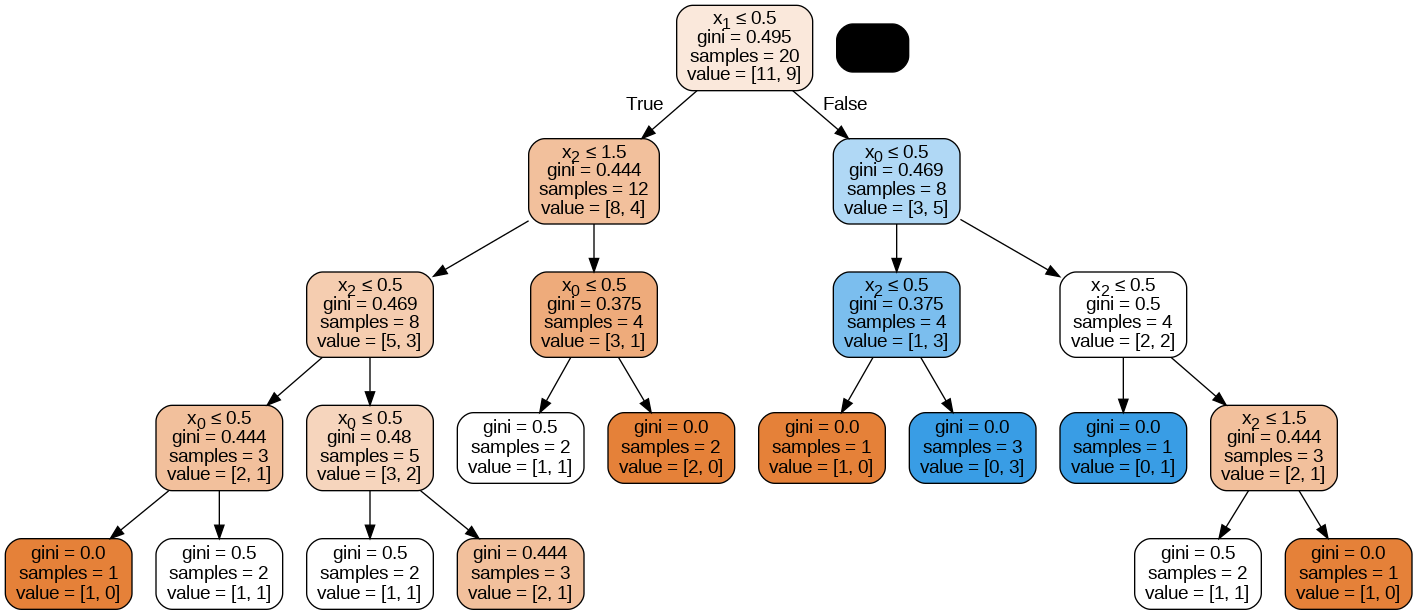

In [28]:
# Lưu tấm hình cây với tên, Show ảnh - Xong
from IPython.display import Image
Image('Tree_Buy_Computer.png')